<a href="https://colab.research.google.com/github/MahuL88/SpecialSkill/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project kali ini adalah Memprediksi apakah seorang siswa akan lulus atau tidak berdasarkan berbagai fitur seperti nilai akademik, absensi, latar belakang keluarga, dan faktor lainnya. project ini saya gunakan untuk mendukung SDGS yang keempat (Quality Education) karena Membantu institusi pendidikan mengidentifikasi siswa yang berisiko tidak lulus, sehingga bisa dilakukan intervensi lebih dini. Untuk Model yang digunakan adalah Naive Bayes, karena karena merupakan tipe model probalistik ,ringan,cepat dan efisien, yang sangat cocok untuk data yang sederhana dan tidak terlalu kompleks.

Source : [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

# Load & Eksplorasi Data

In [ ]:
# Impor library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Load data ke sebuah dataframe bernama StudePerf
StudPerf = pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
# Melihat jumlah kolom dan baris(terdapat 8 kolom dan 1000 data)
StudPerf.shape

(1000, 8)

In [ ]:
#cek detail informasi kolom (tidak ada missing value)
StudPerf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Melihat table secara garis besar dan tipe data(sudah sesuai seperti sebelumnya)
StudPerf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Analisis Statistik dasar (terlihat tidak ada nilai outlier karena nilai maks 100, min 0 dan average di sekitar 60 an)
StudPerf.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
#Cek banyak baris yang terduplikat(tidak ada data duplikat)
StudPerf.duplicated().sum()

np.int64(0)

mengecek nilai unik yang terdapat pada setiap kolom yang bertipe kategorikal untuk melihat kategori apa saja yang ada pada kolom tersebut.

In [ ]:
StudPerf['gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
StudPerf['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [ ]:
StudPerf['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [ ]:
StudPerf['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [ ]:
StudPerf['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

## Kesimpulan

Dari hasil eksplorasi ini, tidak ditemukan data yang duplikat, missing value, tipe datanya sudah sesuai format, dan tidak ada data yang aneh/typo pada kolom yang bertipe kategorikal.

# Preprocessing

Melakukan One Hot Encoding pada tipe data kategorikal

In [ ]:
# Mapping kategori gender
gender_mapping = {
    'male': 0,
    'female':1
}

# Mengubah kolom gender berdasarkan mapping
StudPerf['gender'] = StudPerf['gender'].map(gender_mapping).astype('category').cat.codes

In [ ]:
# Mapping kategori race
race_mapping = {
    'group A': 0,
    'group B': 1,
    'group C': 2,
    'group D': 3,
    'group E': 4
}

# Mengubah kolom race berdasarkan mapping
StudPerf['race/ethnicity'] = StudPerf['race/ethnicity'].map(race_mapping).astype('category').cat.codes

In [ ]:
# Mapping kategori parental level
parental_mapping = {
    'some high school': 0,
    'high school': 1,
    'some college': 2,
    'associate\'s degree': 3,
    'bachelor\'s degree': 4,
    'master\'s degree': 5
}

# Mengubah kolom parental level berdasarkan mapping
StudPerf['parental level of education'] = StudPerf['parental level of education'].map(parental_mapping).astype('category').cat.codes

In [ ]:
# Mapping kategori parental lunch
lunch_mapping = {
    'standard': 0,
    'free/reduced': 1
}

# Mengubah kolom lunch berdasarkan mapping
StudPerf['lunch'] = StudPerf['lunch'].map(lunch_mapping).astype('category').cat.codes

In [ ]:
# Mapping kategori parental test preparation
test_mapping = {
    'none': 0,
    'completed': 1
}

# Mengubah kolom parental test preparation berdasarkan mapping
StudPerf['test preparation course'] = StudPerf['test preparation course'].map(test_mapping).astype('category').cat.codes

Setelah itu, saya menambahkan kolom baru untuk label targetnya yang berkategori lulus/tidak lulus, dimana nilai lulus 1 dan tidak lulus 0. setelah itu, nilai rata-rata dari ketiga nilai numerikal akan dibuat menjadi pertimbangan kelulusan dimana jika rata-rata ketiga nilainya lebih besar sama dengan 70, maka siswa tersebut akan lulus. Meskipun data numerikal ini sangat berperan dalam prediksi kelulusan, data kategorikal memberikan konteks tambahan yang sangat berguna, artinya model bisa juga menebak berdasarkan latar belakangnya. Oleh karena itu, fitur kategorikal perlu di-encode menjadi format numerik agar bisa dimasukkan ke dalam model Naive Bayes, yang pada gilirannya meningkatkan kemampuan model untuk memprediksi kelulusan siswa dengan lebih akurat.

In [ ]:
StudPerf['lulus'] = ((StudPerf['math score'] + StudPerf['reading score'] + StudPerf['writing score']) / 3 >= 70).astype(int)

In [ ]:
# Melihat kembali table secara garis besar sebanyak 10 baris saja
StudPerf.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,lulus
0,1,1,4,0,0,72,72,74,1
1,1,2,2,0,1,69,90,88,1
2,1,1,5,0,0,90,95,93,1
3,0,0,3,1,0,47,57,44,0
4,0,2,2,0,0,76,78,75,1
5,1,1,3,0,0,71,83,78,1
6,1,1,2,0,1,88,95,92,1
7,0,1,2,1,0,40,43,39,0
8,0,3,1,1,1,64,64,67,0
9,1,1,1,1,0,38,60,50,0


## Kesimpulan

Dapat dilihat pada tabel bahwa data sudah bersih dan siap untuk dilatih dan diprediksi

# Modeling

In [ ]:
X = StudPerf.drop('lulus', axis=1)  # fitur-fitur(tanpa kolom target)
y = StudPerf['lulus']  # Label (kolom target)

# Split data menjadi training dan testing (70% data training dan 30% data testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = GaussianNB() # Membuat model Naive Bayes dari library yang sudah diimpor sebelumnya
model.fit(X_train, y_train) # Mulai melatih model

GaussianNB()

In [ ]:
# Prediksi hasil dari data uji
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       169
           1       0.96      0.97      0.97       131

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



## Kesimpulan

Dari hasil training dan evaluasi model, model Naive Bayes menunjukkan akurasinya mencapai 97%, yang menandakan bahwa model sangat efektif dalam memprediksi kelulusan siswa berdasarkan fitur yang ada. Metrik precision, recall, dan f1-score untuk kedua kelas (lulus dan tidak lulus) juga sangat baik, dengan nilai sekitar 0.97 untuk masing-masing. Ini menunjukkan bahwa model berhasil menjaga keseimbangan yang baik antara seberapa sering prediksi benar (precision) dan seberapa banyak siswa yang benar-benar lulus atau tidak lulus berhasil diprediksi dengan tepat (recall).

# Interpretasi & Insights

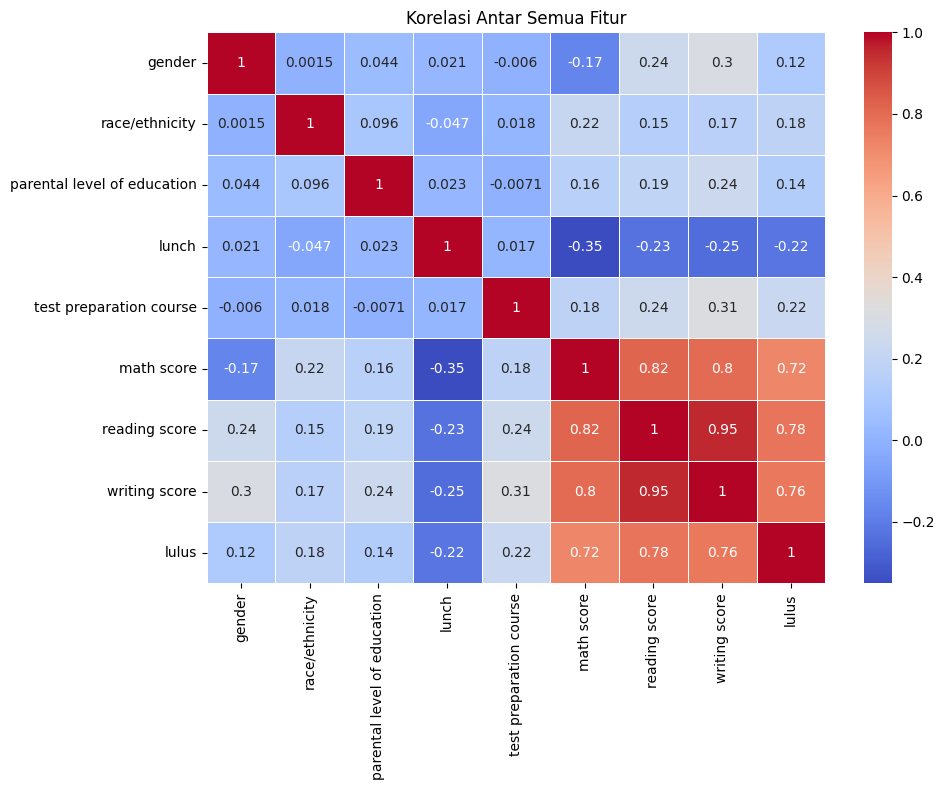

In [ ]:
corr_matrix = StudPerf.corr(numeric_only=True)

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Semua Fitur')
plt.tight_layout()
plt.show()

Dari hasil Korelasi HeatMap, nilai score memang paling berpengaruh terhadap kelulusan mahasiswa. selain itu, reading score dan writing score memiliki korelasi positif yang sangat tinggi, yang artinya semakin tinggi nilai reading semakin tinggi juga nilai writing score.  sedangkan untuk lunch dan test preparation course memilki nilai korelasi yang sama tetapi berbanding terbalik(untuk lebih jelasnya, dapat dilihat di visualisasi di bawah).

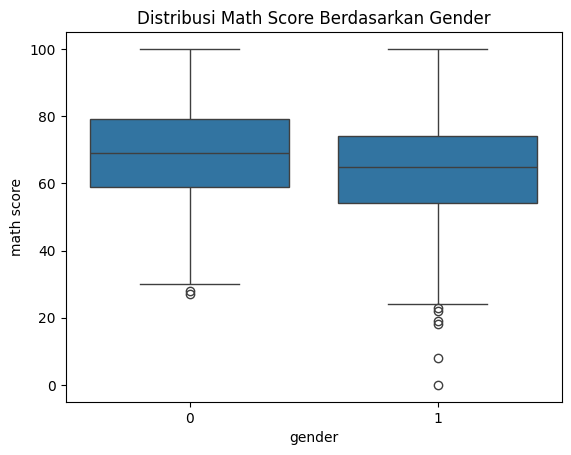

In [ ]:
sns.boxplot(data=StudPerf, x='gender', y='math score')
plt.title('Distribusi Math Score Berdasarkan Gender')
plt.show()

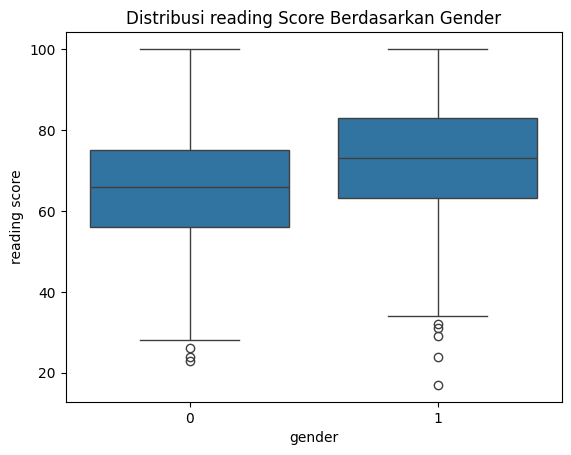

In [ ]:
sns.boxplot(data=StudPerf, x='gender', y='reading score')
plt.title('Distribusi reading Score Berdasarkan Gender')
plt.show()

Dari kedua box plot tersebut, dapat dilihat bahwa score math terbaik cenderung didominasi oleh laki-laki(0) sedangkan reading score maupun writing score (karena korelasi positif) cenderung didominasi oleh perempuan(1)

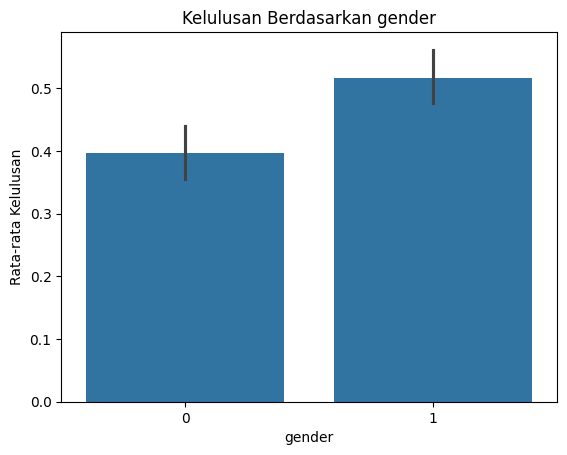

In [ ]:
sns.barplot(data=StudPerf, x='gender', y='lulus')
plt.title('Kelulusan Berdasarkan gender')
plt.ylabel('Rata-rata Kelulusan')
plt.show()

meskipun math score didominasi oleh laki-laki, rata-rata kelulusan untuk ketiga pelajaran tersebut masih didominasi oleh perempuan. hal ini disebabkan nilai writing dan reading score yang tinggi berkemungkinkan besar untuk lulus dalam rata-rata kelulusan.

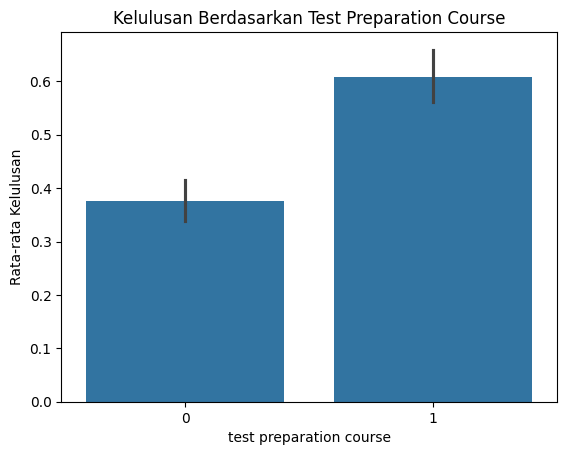

In [ ]:
sns.barplot(data=StudPerf, x='test preparation course', y='lulus')
plt.title('Kelulusan Berdasarkan Test Preparation Course')
plt.ylabel('Rata-rata Kelulusan')
plt.show()

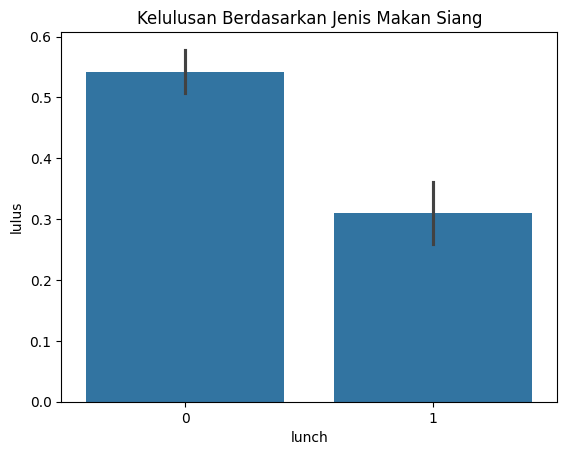

In [ ]:
sns.barplot(data=StudPerf, x='lunch', y='lulus')
plt.title('Kelulusan Berdasarkan Jenis Makan Siang')
plt.show()

Dari keseluruhan hasil, dapat disimpulkan bahwa, meskipun score yang didapat siswa merupakan hal yang sangat memengaruhi kelulusan, terdapat beberapa faktor yang juga memengaruhi kelulusan siswa tersebut. seperti, kebanyakan laki-laki pandai dalam hal math dan sebaliknya perempuan pandai dalam hal membaca/menulis, jauh lebih memungkinkan untuk lulus jika mengikuti test preparation course dibanding tidak sama sekali, dan umlah siswa yang lulus lebih tinggi pada kelompok dengan makan siang kategori standard (0) dibandingkan kelompok free/reduced (1).

Model ini memprediksi kelulusan siswa dengan menggabungkan nilai akademik dan faktor sosial, sehingga mampu meniru keputusan kelulusan yang kompleks di dunia nyata, bukan hanya berdasarkan nilai rata-rata. Selain sebagai alat prediksi, model juga berguna untuk memvalidasi keputusan guru dengan mengidentifikasi ketidaksesuaian, serta mengotomatisasi proses penilaian secara efisien. Model ini membantu mendeteksi risiko siswa yang mungkin tidak lulus meski memiliki nilai cukup, serta mengungkap potensi bias sosial yang perlu diatasi. Oleh karena itu, direkomendasikan menggunakan versi model dengan fitur sosial untuk deteksi dini dan versi lengkap untuk prediksi akhir. hal ini dapat dilihat dengan mencoba untuk menguji model pada script di bawah ini(input dari user)

In [ ]:
# Fungsi untuk meminta input dari user dan mengubahnya ke format yang benar
def get_user_input():
    # Mengambil input dari user untuk setiap fitur
    print("Masukkan nilai numerik untuk setiap fitur berikut:")

    gender = int(input("Gender (0 = male, 1 = female): "))

    race = int(input("Race/Ethnicity (0 = group A, 1 = group B, 2 = group C, 3 = group D, 4 = group E): "))

    parental_education = int(input("Parental Level of Education (0 = some high school, 1 = high school, 2 = some college, 3 = associate's degree, 4 = bachelor's degree, 5 = master's degree): "))

    lunch = int(input("Lunch (0 = standard, 1 = free/reduced): "))

    test_preparation = int(input("Test Preparation Course (0 = none, 1 = completed): "))

    math_score = int(input("Math Score (0 - 100): "))

    reading_score = int(input("Reading Score (0 - 100): "))

    writing_score = int(input("Writing Score (0 - 100): "))
    print("------------------------------------------------------------------")

    # Mengembalikan input yang sudah diubah menjadi list
    return [gender, race, parental_education, lunch, test_preparation, math_score, reading_score, writing_score]

# Fungsi untuk memprediksi kelulusan berdasarkan input
def predict_lulus(input_data):
    # Convert input_data ke array numpy agar bisa diprediksi
    input_array = np.array(input_data).reshape(1, -1)

    # Prediksi menggunakan model yang sudah dilatih
    prediction = model.predict(input_array)

    # Logika kondisi untuk hasil yg bernilai 1 akan mengembalikan pesan lulus dan sebaliknya
    if prediction == 1:
      return "Anda Lulus"
    else:
      return "Anda tidak Lulus"

# Mengambil input dari pengguna
input_user = get_user_input()

# Prediksi berdasarkan input user
result = predict_lulus(input_user)
print(result)

Masukkan nilai numerik untuk setiap fitur berikut:
Gender (0 = male, 1 = female): 1
Race/Ethnicity (0 = group A, 1 = group B, 2 = group C, 3 = group D, 4 = group E): 0
Parental Level of Education (0 = some high school, 1 = high school, 2 = some college, 3 = associate's degree, 4 = bachelor's degree, 5 = master's degree): 0
Lunch (0 = standard, 1 = free/reduced): 1
Test Preparation Course (0 = none, 1 = completed): 0
Math Score (0 - 100): 70
Reading Score (0 - 100): 70
Writing Score (0 - 100): 70
------------------------------------------------------------------
Anda tidak Lulus


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
